<a href="https://colab.research.google.com/github/lakshita1808/breast-cancer-prediction-model/blob/main/breast_cancer_prediction_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convert to DataFrame for easy handling
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


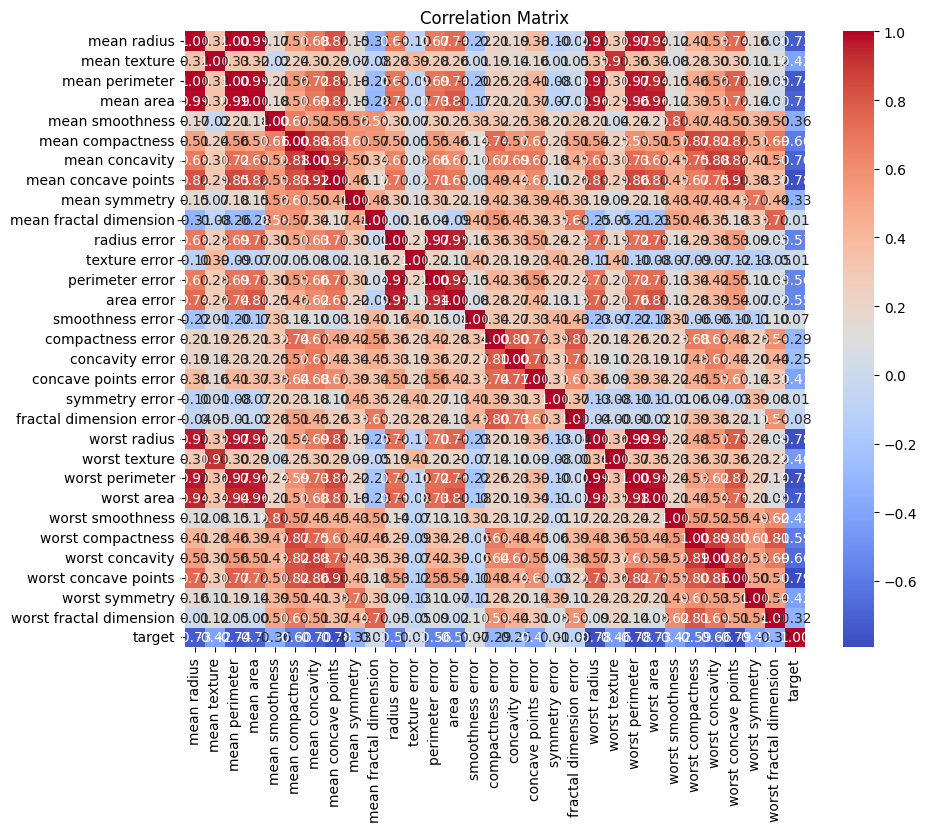

In [ ]:
# Basic statistics of the dataset
df.describe()

# Check for any missing values
df.isnull().sum()

# Correlation matrix to understand relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df = df.drop([
    'mean perimeter', 'mean area', 'radius error', 'perimeter error', 'area error',
    'worst radius', 'worst perimeter', 'worst area'
], axis=1)

# Confirm changes
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,smoothness error,...,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,0.006399,...,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,0.005225,...,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,0.006150,...,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.1560,0.009110,...,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,0.011490,...,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Dropping features that are strongly correlated (as seen in heatmap)
df = df.drop(['perimeter_mean', 'area_mean', 'radius_se', 'perimeter_se', 'area_se',
              'radius_worst', 'perimeter_worst', 'area_worst'], axis=1)

# Confirm it's dropped
df.head()

KeyError: "['perimeter_mean', 'area_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst'] not found in axis"

In [ ]:
# Check the column names after dropping features
df.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst texture',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
# Dropping features that are highly correlated
df = df.drop([
    'mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
    'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension'
], axis=1)

# Check the remaining columns
df.columns

Index(['texture error', 'smoothness error', 'compactness error',
       'concavity error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst texture', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df.drop('target', axis=1)  # All columns except 'target' are features
y = df['target']  # 'target' is what we want to predict

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 14), (114, 14), (455,), (114,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForest model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForest model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.9210526315789473


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9210526315789473
Confusion Matrix:
 [[37  6]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.92      0.96      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'breast_cancer_model.pkl')

# Confirm the model is saved
print("Model saved as 'breast_cancer_model.pkl'")

Model saved as 'breast_cancer_model.pkl'


In [ ]:
http://files.download

SyntaxError: invalid syntax (<ipython-input-13-3c5b8e0c9133>, line 1)

In [ ]:
from google.colab import files
files.download('breast_cancer_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import confusion_matrix

# Get model predictions
y_pred = model.predict(X_test)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[37  6]
 [ 3 68]]
